<a href="https://colab.research.google.com/github/lorenzotomada/Applied_Mathematics/blob/main/Code/AM_lab11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**An introduction to the Finite Element Method (FEM) using _FEniCS_**

In order to solve a simple elliptic equation, we will use _FEniCS_ (FE stands for "Finite Element", CS for "Computational Software"), a popular Python library for the solution of PDEs.

We start by importing dolfin (which is the backend for FEniCS, written in C++ in order to take care of the most computationally intense tasks).

In [20]:
try:
    import dolfin
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/fenics-install-real.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"

    import dolfin

In [21]:
from dolfin import *

##**The 1D case:**

We want to solve the following equation:


\begin{cases}
    -u'' = 1, x\in (0,1) \\
    u(0)=u(1)=0
\end{cases}


Let us start by creating a mesh on the interval $(0, 1)$:

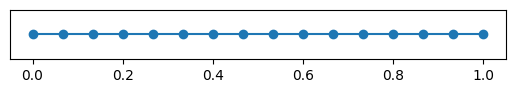

In [22]:
mesh = UnitIntervalMesh(15)
plot(mesh) # To plot the mesh

Here 15 is the number of cells in which we discretize our domain. The number of points is given by $1$ plus the number of cells (so we have 16 vertices).

Now we create the function space $V$, whose elements are piecewise linear polynomials of degree $1$ which are continuous on $[0,1]$.

In [23]:
V = FunctionSpace(mesh, 'Lagrange', 1)
print(V.dim()) # To print the dimension

16


Now we allocate a test function $v$ and a trial function $u$ in $V$. Test functions are clearly allocated in $v$, whereas $u$ is the variable in which we will allocate the solution of the problem.

In [24]:
v = TestFunction(V)
u = TrialFunction(V)

Now we define the bilinear form $a$ and the functional $b$.

Further explanations are provided in the comments.

In [25]:
a = u.dx(0)*v.dx(0)*dx
# "0" is related to the fact that we only consider the 1st derivative with respect to x. We work in a 1-dimensional context
# "*dx" = perform an integration. See the weak formulation of the problem.
b = v*dx

Now we define two subdomains: left and right, corresponding to the two parts of the boundary of the domain.

In [26]:
class Left(SubDomain):
  def inside(self, x, on_boundary):
    return on_boundary and abs(x[0]-0)< DOLFIN_EPS

class Right(SubDomain):
  def inside(self, x, on_boundary):
    return on_boundary and abs(x[0]-1.)< DOLFIN_EPS

We can assign a label to each component of the boundary, in order to be able to use some FEniCS constructors to implement boundary conditions with ease.

In [27]:
boundaries = MeshFunction('size_t', mesh, mesh.topology().dim()-1) # The inputs are format, mesh and dimension of the boundary
boundaries.set_all(0) # 0 = dimension of the boundary

left = Left() # Location of the left extreme of the interval. We assign the label 1 to it
left.mark(boundaries, 1)
right = Right() # Label 2 on the right
right.mark(boundaries, 2)

Now we impose the boundary conditions:

In [28]:
#bcs = DirichletBC(V, 0.0, boundaries, 1)
# Basically we are considering functions in V that on the boundaries marked by 1 are equal 0. The 2nd input is the value of the boundary condition,
# the 4th one is the label we want to consider.
# However, this would impose the condition on just one of the two points {a, b}, so we define a list of boundary conditions:

bcs = [DirichletBC(V, 0.0, boundaries, 1), DirichletBC(V, 0.0, boundaries, 2)]

Now we can solve the problem and plot the solution:

In [29]:
solution = Function(V) # Here we allocate the solution, which is an element of the space in which we have the test functions.
# We want to solve a == b:  we use the 'solve' function.

solve(a==b, solution, bcs) # The solution is allocated in the 2nd input.
# The first input is the expression we want to solve, whereas the third argument are the boundary conditions.

Now we plot the FE solution:

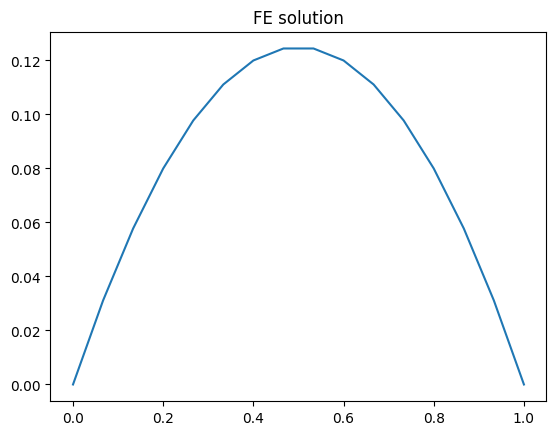

In [30]:
plot(solution, title = 'FE solution')

##**The 2D case:**

Same thing as before, but in 2D:

\begin{cases}
    -\Delta u = 1, (x,y)\in (0,1)\times (0,1) \\
    u(x, 0)=0, \forall x\in (0,1) \\
    u(0, y) = 0, \forall y\in (0,1)
\end{cases}

Consider a mesh on the square. The input of the function is the number of cells in which we want to discretize our domain.

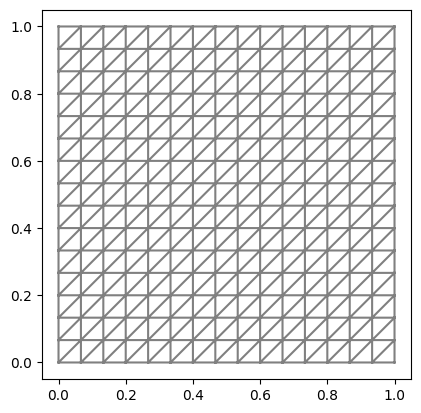

In [31]:
mesh2 = UnitSquareMesh(15,15)
plot(mesh2)

The rest works as before.

In [32]:
V2 = FunctionSpace(mesh2, 'Lagrange', 2) # Piecewise quadratic polynomials which are continuous on (0,1)^2.
print(V2.dim())

961


In [33]:
v2 = TestFunction(V2)
u2 = TrialFunction(V2)

In [34]:
a2 = inner(grad(u2),grad(v2))*dx # "inner" to compute the scalar product; "grad" representing the gradient.
b2 = v2*dx

In [35]:
class Left(SubDomain):
  def inside(self, x, on_boundary):
    return on_boundary and abs(x[0]-0)< DOLFIN_EPS

class Down(SubDomain):
  def inside(self, x, on_boundary):
    return on_boundary and abs(x[1]-0)< DOLFIN_EPS

# We could also define the following two subdomains, but just to have a nicer plot we will not do that:

#class Right(SubDomain):
#  def inside(self, x, on_boundary):
#    return on_boundary and abs(x[0]-1.)< DOLFIN_EPS

#class Up(SubDomain):
#  def inside(self, x, on_boundary):
#    return on_boundary and abs(x[1]-1.)< DOLFIN_EPS

In [36]:
boundaries2 = MeshFunction('size_t', mesh2, mesh2.topology().dim()-1)
boundaries2.set_all(0)

left = Left()
left.mark(boundaries2, 1)
down = Down()
down.mark(boundaries2, 1) # We could have assigned a different label to it. This was just to show that you can assign multiple labels to different subdomains.
#right = Right()
#right.mark(boundaries2, 2)
#up = Up()
#up.mark(boundaries2, 3)

#bcs2 = [DirichletBC(V2, 0.0, boundaries2, 1), DirichletBC(V2, 0.0, boundaries2, 2), DirichletBC(V2, 0.0, boundaries2, 3)]

bcs2 = DirichletBC(V2, 0.0, boundaries2, 1)

In [37]:
solution2 = Function(V2)
solve(a2==b2, solution2, bcs2)

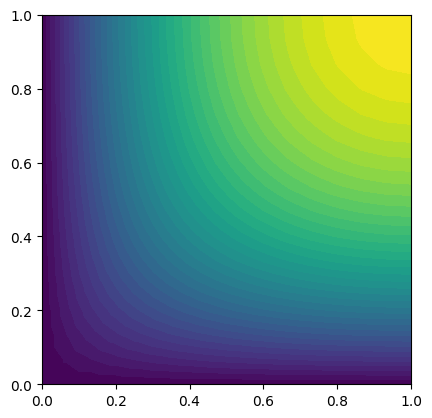

In [38]:
plot(solution2)